# Mini Project: Studying Stability in Gradient-Based Learning
**Name:** Ayushi

### Project Overview

In this mini-project, I built a simple linear regression model from scratch to study the effect of learning rate on training stability.  
I generated a synthetic dataset, defined prediction and loss functions, and implemented a gradient descent training loop.  
I then performed three experiments with different learning rates (0.01, 1.0, 0.001) to observe stable learning, failure due to high learning rate, and recovery with a lower learning rate.  
The results were analyzed using loss plots, and observations were noted for each experiment.




In [9]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


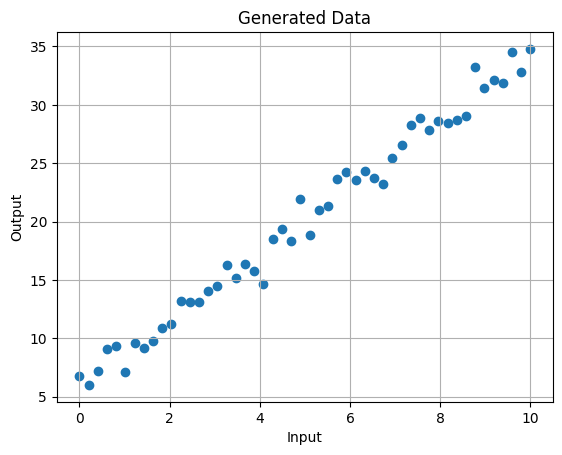

In [20]:
# Generate synthetic dataset
np.random.seed(0)

# input data
X = np.linspace(0, 10, 50)

# output data (y) with some noise
y = 3 * X + 5 + np.random.randn(50)

#plot data
plt.scatter(X, y)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Generated Data")
plt.grid(True)
plt.show()


In [21]:
# Initialize model parameters
w = 0.0
b = 0.0


In [11]:
# Prediction Function
def predict(X, w, b):
    return w * X + b

# Mean squared error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [19]:
# Gradient descent training function
def train(X, y, w, b, learning_rate, epochs):
    losses = []

    for _ in range(epochs):
        y_pred = predict(X, w, b)

        # Gradients (how to change w and b)
        dw = -2 * np.mean(X * (y - y_pred))
        db = -2 * np.mean(y - y_pred)

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        loss = mean_squared_error(y, y_pred)
        losses.append(loss)

    return w, b, losses


## Experiment 1: Stable Learning Rate (0.01)


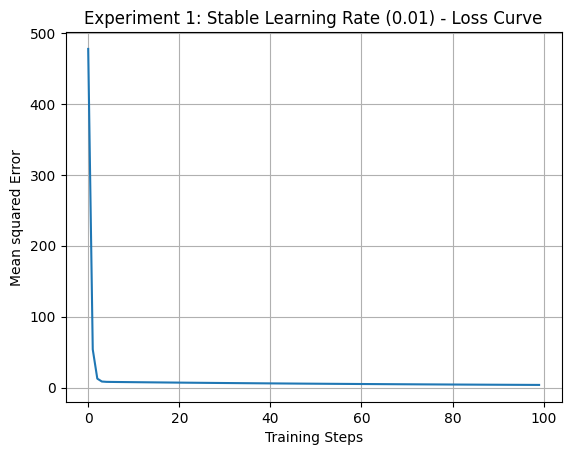

In [22]:
# Experiment 1: Stable learning rate
learning_rate = 0.01
epochs = 100

w_trained, b_trained, losses = train(X, y, w, b, learning_rate, epochs)

plt.plot(losses)
plt.xlabel("Training Steps")
plt.ylabel("Mean squared Error")
plt.title("Experiment 1: Stable Learning Rate (0.01) - Loss Curve")
plt.grid(True)
plt.show()


Observation:
Using a small learning rate (0.01) allows the model to converge smoothly.
The loss decreases steadily. This baseline shows I can control hyperparameters and observe patterns efficiently.

## Experiment 2: High Learning Rate (1.0)


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-3344576671.py:7: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


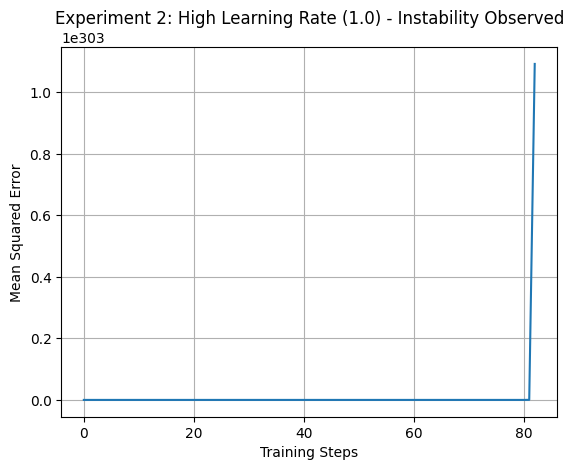

In [23]:
# Experiment 2: High learning rate to break the model
learning_rate = 1.0

w_trained, b_trained, losses = train(X, y, w, b, learning_rate, epochs)

plt.plot(losses)
plt.xlabel("Training Steps")
plt.ylabel("Mean Squared Error")
plt.title("Experiment 2: High Learning Rate (1.0) - Instability Observed")
plt.grid(True)
plt.show()


Failure Observation:
When the learning rate was increased from 0.01 to 1.0, training became unstable.

Evidence:
- The loss curve exploded instead of decreasing.
- Numerical overflow warnings appeared during computation.

Interpretation:
Large parameter updates caused predictions to grow uncontrollably.
This led to loss values exceeding numerical limits.

Conclusion:
This experiment shows that Gradient-based learning is highly sensitive to step size.
I learned the importance of testing hyperparameters carefully and observing model behaviour.


## Experiment 3: Recovery Learning Rate (0.001)


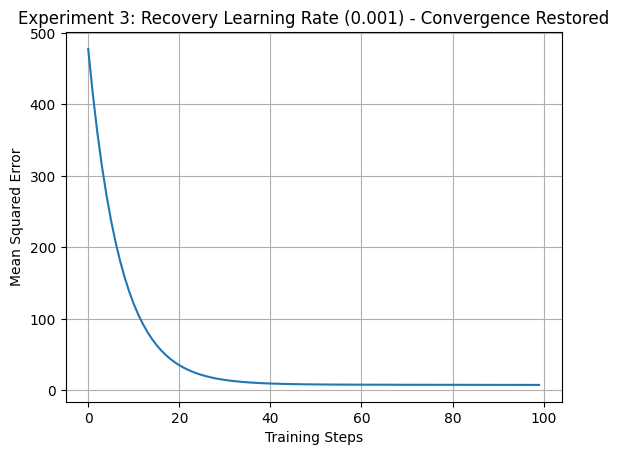

In [24]:
# Experiment 3: Reduced learning rate to restore stability
learning_rate = 0.001

w_trained, b_trained, losses = train(X, y, w, b, learning_rate, epochs)

plt.plot(losses)
plt.xlabel("Training Steps")
plt.ylabel("Mean Squared Error")
plt.title("Experiment 3: Recovery Learning Rate (0.001) - Convergence Restored")
plt.grid(True)
plt.show()


Recovery Observation:
When the learning rate was reduced to 0.001, the model learned steadily with decreasing loss.
This experiment shows that model stability can be stored by careful hyperparameter selection.
I now understand how learning rate impacts model convergence and stability in practice.



### My Contribution

All code, experiments, and analyses in this notebook were implemented and executed independentely.  
I designed the synthetic dataset, defined the model and training functions, performed experiments with varying learning rates, and analyzed the results.  



## Future Work / Next Steps

1. Explore advanced optimization techniques (e.g., Adam, RMSprop) to improve convergence speed.
2. Test this model on larger and more complex datasets to evaluate scalability.
3. I want to introduce noise and data perturbations to study model robustness.
4. Compare different loss functions and their effect on learning stability.
5. Package these experiments into a reusable module for automated analysis.
